Topic:        Challenge Set 1<br>
Subject:      Explore MTA turnstile data<br>
Date:         01/13/2018<br>
Name:         Youngho Jung<br>
Worked with:  Jon, Jit, Browning<br>

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from copy import deepcopy 
from datetime import datetime
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Challenge 1**

In [2]:
# extract the turnstile data
df_mta = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_180113.txt')

In [4]:
# strip strings
df_mta.columns = df_mta.columns.str.strip()
list_mta_columns = df_mta.columns
df_mta_str = df_mta.select_dtypes(['object'])
df_mta[df_mta_str.columns] = df_mta_str.apply(lambda x: x.str.strip())

In [5]:
# make a list with pandas data
list_mta = []
for idx, row in df_mta.iterrows():
    list_mta.append(row)


In [269]:
# convert it into dictionary
d_mta = {}
for l in list_mta:
    d_mta.setdefault(tuple(l[:4]), []).append(list(l[4:]))
#list(d_mta.items())[0]

**Challenge 2**

In [8]:
# make a time-series dictionary
d_mta_ts = {}
for key, values in d_mta.items():
    d_mta_ts.setdefault(key, [])
    for value in values:
        # convert date & time to datetime format
        dt = value[2] + " " + value[3]
        d_mta_ts[key].append([datetime.strptime(dt, '%m/%d/%Y %H:%M:%S'), value[5]])
list(d_mta_ts.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [[datetime.datetime(2018, 1, 6, 3, 0), 6470216],
  [datetime.datetime(2018, 1, 6, 7, 0), 6470223],
  [datetime.datetime(2018, 1, 6, 11, 0), 6470256],
  [datetime.datetime(2018, 1, 6, 15, 0), 6470379],
  [datetime.datetime(2018, 1, 6, 19, 0), 6470665],
  [datetime.datetime(2018, 1, 6, 23, 0), 6470809],
  [datetime.datetime(2018, 1, 7, 3, 0), 6470843],
  [datetime.datetime(2018, 1, 7, 7, 0), 6470849],
  [datetime.datetime(2018, 1, 7, 11, 0), 6470884],
  [datetime.datetime(2018, 1, 7, 15, 0), 6471042],
  [datetime.datetime(2018, 1, 7, 19, 0), 6471222],
  [datetime.datetime(2018, 1, 7, 23, 0), 6471327],
  [datetime.datetime(2018, 1, 8, 3, 0), 6471341],
  [datetime.datetime(2018, 1, 8, 7, 0), 6471353],
  [datetime.datetime(2018, 1, 8, 11, 0), 6471501],
  [datetime.datetime(2018, 1, 8, 15, 0), 6471703],
  [datetime.datetime(2018, 1, 8, 19, 0), 6472505],
  [datetime.datetime(2018, 1, 8, 23, 0), 6472747],
  [datetime.datetime(2018, 1, 9, 3, 0), 6472772]

In [21]:
# count the traffic between each time interval
for key, values in d_mta_ts.items():
    # initialize a new list: new_value
    new_value = deepcopy(values)
    for i in range(1, len(values)):
        new_value[i][1] = values[i][1] - values[i-1][1]
    new_value[0][1] = np.nan
    d_mta_ts[key] = new_value


(('A002', 'R051', '02-00-00', '59 ST'),
 [[datetime.datetime(2018, 1, 6, 3, 0), nan],
  [datetime.datetime(2018, 1, 6, 7, 0), 7],
  [datetime.datetime(2018, 1, 6, 11, 0), 33],
  [datetime.datetime(2018, 1, 6, 15, 0), 123],
  [datetime.datetime(2018, 1, 6, 19, 0), 286],
  [datetime.datetime(2018, 1, 6, 23, 0), 144],
  [datetime.datetime(2018, 1, 7, 3, 0), 34],
  [datetime.datetime(2018, 1, 7, 7, 0), 6],
  [datetime.datetime(2018, 1, 7, 11, 0), 35],
  [datetime.datetime(2018, 1, 7, 15, 0), 158],
  [datetime.datetime(2018, 1, 7, 19, 0), 180],
  [datetime.datetime(2018, 1, 7, 23, 0), 105],
  [datetime.datetime(2018, 1, 8, 3, 0), 14],
  [datetime.datetime(2018, 1, 8, 7, 0), 12],
  [datetime.datetime(2018, 1, 8, 11, 0), 148],
  [datetime.datetime(2018, 1, 8, 15, 0), 202],
  [datetime.datetime(2018, 1, 8, 19, 0), 802],
  [datetime.datetime(2018, 1, 8, 23, 0), 242],
  [datetime.datetime(2018, 1, 9, 3, 0), 25],
  [datetime.datetime(2018, 1, 9, 7, 0), 12],
  [datetime.datetime(2018, 1, 9, 11, 0)

**Challenge 3**

n is 4 in the problem

In [26]:
# convert the previous data into daily data
d_mta_ts_daily = {}
for key, values in d_mta_ts.items():
    for value in values:
        date = value[0].date()
        # add a key if it is not in the dictionary
        new_key = tuple(list(key) + [date])
        d_mta_ts_daily.setdefault(new_key, []).append(value[1])

for key, values in d_mta_ts_daily.items():
    d_mta_ts_daily[key] = int(np.nansum(values))

list(d_mta_ts_daily.items())[:3]

[(('A002', 'R051', '02-00-00', '59 ST', datetime.date(2018, 1, 6)), 593),
 (('A002', 'R051', '02-00-00', '59 ST', datetime.date(2018, 1, 7)), 518),
 (('A002', 'R051', '02-00-00', '59 ST', datetime.date(2018, 1, 8)), 1420)]

In [27]:
# change dictionary keys
d_mta_ts_daily2 = {}
for key, value in d_mta_ts_daily.items():
    new_key = tuple(list(key)[:-1])
    d_mta_ts_daily2.setdefault(new_key, []).append([list(key)[-1], value])

**Challenge 4**

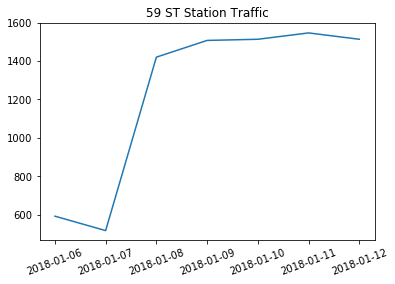

In [28]:
# I will plot the time series graph for ('A002', 'R051', '02-00-00', '59 ST')
time_series = d_mta_ts_daily2[('A002', 'R051', '02-00-00', '59 ST')]
dates, counts = [ts[0] for ts in time_series], [ts[1] for ts in time_series]
plt.plot(dates, counts);
plt.xticks(rotation=20);
plt.title('59 ST Station Traffic');

**Challenge 5** (From here, I will use pandas for practice)

In [29]:
# convert the dictionary to the pandas dataframe
pd_mta = pd.DataFrame(list(d_mta_ts_daily.items()), columns=['key', 'TRAFFIC'])


In [198]:
outliers= list(pd_mta
 .sort_values('TRAFFIC', ascending=False)
 .head(2).index
)
pd_mta.drop(outliers, inplace=True)

In [201]:
pd_mta['C/A'] = pd_mta['key'].apply(lambda s: list(s)[0])
pd_mta['UNIT'] = pd_mta['key'].apply(lambda s: list(s)[1])
pd_mta['STATION'] = pd_mta['key'].apply(lambda s: list(s)[3])
pd_mta['DATE'] = pd_mta['key'].apply(lambda s: list(s)[4])

In [202]:
pd_mta2 = pd_mta[['C/A', 'UNIT', 'STATION', 'DATE', 'TRAFFIC']].reset_index(drop=True)

In [203]:
# combine traffic numbers based on C/A, UNIT, and STATION
pd_mta3 = pd_mta2.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).sum().reset_index()
pd_mta3.head()

,C/A,UNIT,STATION,DATE,TRAFFIC
0,A002,R051,59 ST,2018-01-06,6451
1,A002,R051,59 ST,2018-01-07,5377
2,A002,R051,59 ST,2018-01-08,12765
3,A002,R051,59 ST,2018-01-09,13788
4,A002,R051,59 ST,2018-01-10,13687


**Challenge 6**

In [204]:
# I will plot the time series graph for ('A002', 'R051', '59 ST')
pd_ts = pd_mta3[(pd_mta3['C/A']=='A002') & (pd_mta3['UNIT']=='R051') &
        (pd_mta3['STATION']=='59 ST')]

# print out times series
pd_ts[['DATE', 'TRAFFIC']] 

,DATE,TRAFFIC
0,2018-01-06,6451
1,2018-01-07,5377
2,2018-01-08,12765
3,2018-01-09,13788
4,2018-01-10,13687
5,2018-01-11,13690
6,2018-01-12,13029


**Challenge 7**

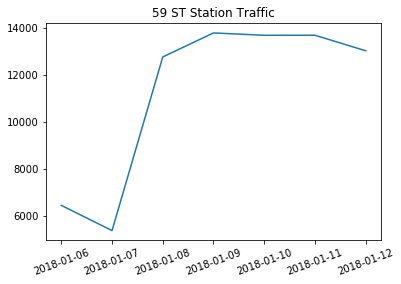

In [205]:
# I will plot the graph based on the data I generated
plt.plot(pd_ts['DATE'], pd_ts['TRAFFIC']);
plt.xticks(rotation=20);
plt.title('59 ST Station Traffic');

**Challenge 8**

In [206]:
## I will collect the data for Dec 2017
dates = ['171202', '171209', '171216', '171223', '171230']
df_mtv_dec = pd.DataFrame(columns=df_mta.columns.str.strip())
for d in dates:
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + d + '.txt'
    df_temp = pd.read_csv(url)
    df_temp.columns = df_mtv_dec.columns
    df_mtv_dec = pd.concat([df_mtv_dec, df_temp])

In [114]:
# extract only necessary columns
df_mtv_dec2 = df_mtv_dec[['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'ENTRIES']]
df_mtv_dec2['ENTRIES_PREV'] = df_mtv_dec2['ENTRIES'].shift(1)

In [116]:
# make a IS_PREV column that checks if the adjacent rows share the common SCP
df_mtv_dec2['IS_PREV'] = df_mtv_dec2['SCP'] == df_mtv_dec2.SCP.shift(1)
# count the traffic between the two time frames 
df_mtv_dec2['TRAFFIC'] = df_mtv_dec2.apply(lambda x: x['ENTRIES'] - x['ENTRIES_PREV'] 
                                           if x['IS_PREV'] else np.nan, axis=1)
df_mtv_dec2['TRAFFIC'] = df_mtv_dec2['TRAFFIC'].apply(lambda s: abs(s))
df_mtv_dec2['DATE'] = pd.to_datetime(df_mtv_dec2['DATE'])

In [215]:
# remove outliers 
outliers = list((df_mtv_dec2
 .sort_values('TRAFFIC', ascending=False)
 .head(100)
 .index
))
df_mtv_dec2.drop(outliers, inplace=True)

In [216]:
df_mtv_dec3 = df_mtv_dec2[['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'TRAFFIC']]

In [217]:
df_mtv_dec4 = df_mtv_dec3.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).sum().reset_index()
df_mtv_dec4.head()
# I will plot the time series graph for ('A002', 'R051', '59 ST')
pd_ts_dec = \
(df_mtv_dec4[(df_mtv_dec4['C/A'] == 'A002') & (df_mtv_dec4['UNIT'] == 'R051') &
                       (df_mtv_dec4['STATION'] == '59 ST')]
 .sort_values('DATE')
)
# assign the order of week for each data
pd_ts_dec['WEEK'] = pd_ts_dec.index // 7 + 1
pd_ts_dec['DAYS'] = pd_ts_dec.index % 7 + 1

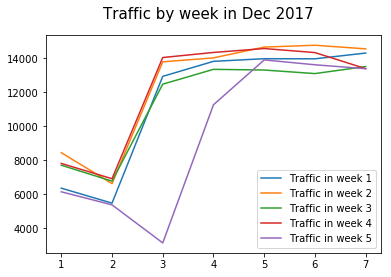

In [219]:
# plot time series for all weeks
fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.suptitle('Traffic by week in Dec 2017', fontsize=15)

for key, grp in pd_ts_dec.groupby(['WEEK']):
    ax.plot(grp['DAYS'], grp['TRAFFIC'], label = "Traffic in week {:d}".format((grp['WEEK'].iloc[0])))
plt.legend(loc='best')    
plt.show()

**Challenge 9**

In [223]:
# sum all traffic for each station in Dec 2017
df_mtv_dec5 = df_mtv_dec3.groupby(['C/A', 'UNIT', 'STATION']).sum().reset_index()
(df_mtv_dec5
 .sort_values('TRAFFIC', ascending=False)
).head(2)

# Top 2 busiest stations are PATH NEW WTC and GRD CNTRL-42 ST

,C/A,UNIT,STATION,TRAFFIC
450,PTH22,R540,PATH NEW WTC,1652366.0
559,R238,R046,GRD CNTRL-42 ST,1649062.0


**Challenge 10**

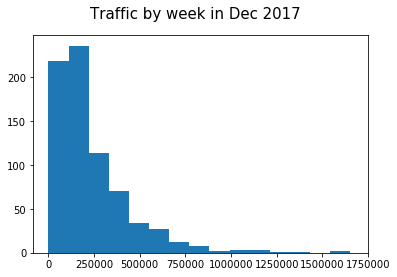

In [267]:
# draw a histogram
fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.suptitle('Traffic by week in Dec 2017', fontsize=15)
ax.hist(df_mtv_dec5['TRAFFIC'], bins=15);

ax.xaxis.set_ticks(np.arange(0, 1750001, 250000));